## Estacionalidad Tendencia y Error (ETE)

### Librerias

In [110]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Data

In [111]:
df_aerolinea = pd.read_csv("/home/daniel/Drive WLS/Cursos/machine-learning/series_de_tiempo/Data/AirPassengers.csv", index_col="Month")
df_aerolinea= df_aerolinea.rename(columns={"#Passengers": "Passengers"})
df_aerolinea.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Transformación

In [112]:
df_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [113]:
df_aerolinea.isnull().sum()

Passengers    0
dtype: int64

In [114]:
df_aerolinea.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [115]:
df_aerolinea.index = pd.to_datetime(df_aerolinea.index)

In [116]:
df_aerolinea.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [117]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Analisis ETE

<Axes: xlabel='Month'>

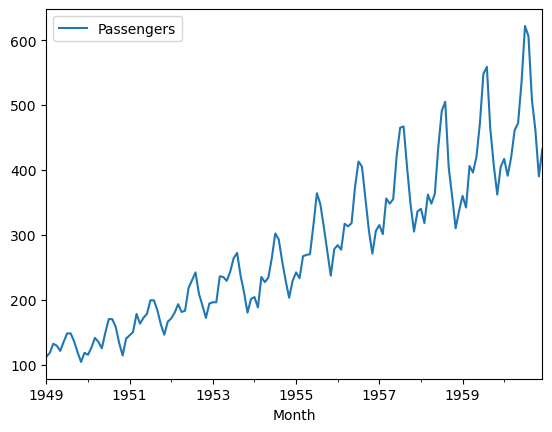

In [118]:
df_aerolinea.plot()

In [119]:
ete = seasonal_decompose(df_aerolinea["Passengers"], model="aditive")
ete

<Axes: xlabel='Month'>

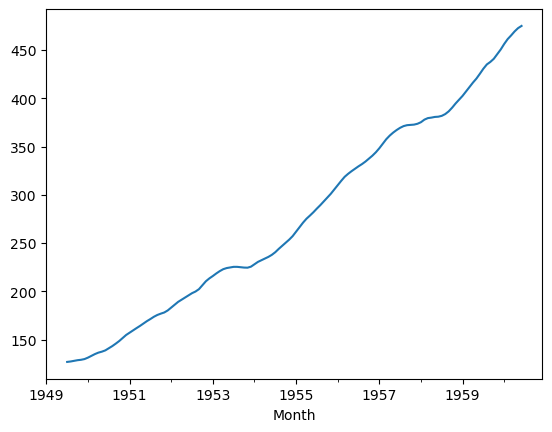

In [120]:
ete.trend.plot() # tendencia del modelo

<Axes: xlabel='Month'>

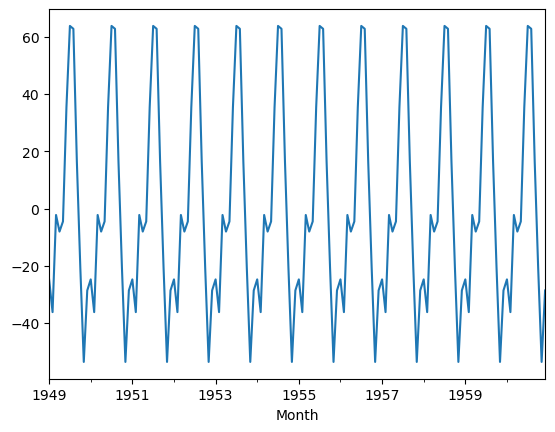

In [121]:
ete.seasonal.plot() #Estacionalidad del modelo

<Axes: xlabel='Month'>

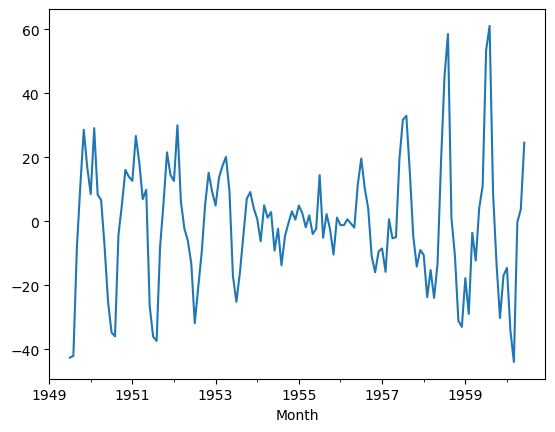

In [122]:
ete.resid.plot() #Errores del modelo

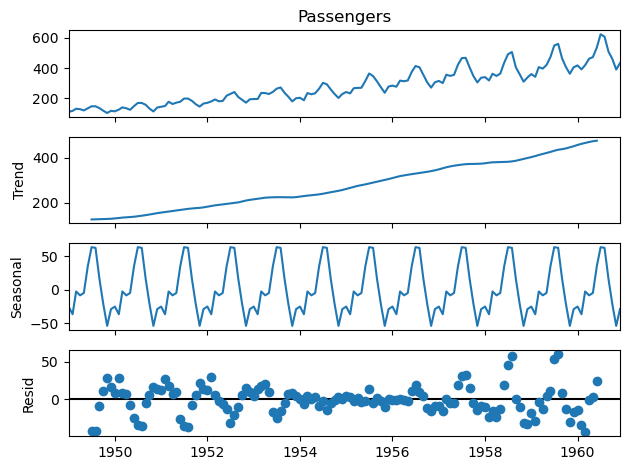

In [123]:
grafica_model_aditive=ete.plot()

In [124]:
ete_multi = seasonal_decompose(df_aerolinea["Passengers"], model="multiplicative")
ete_multi

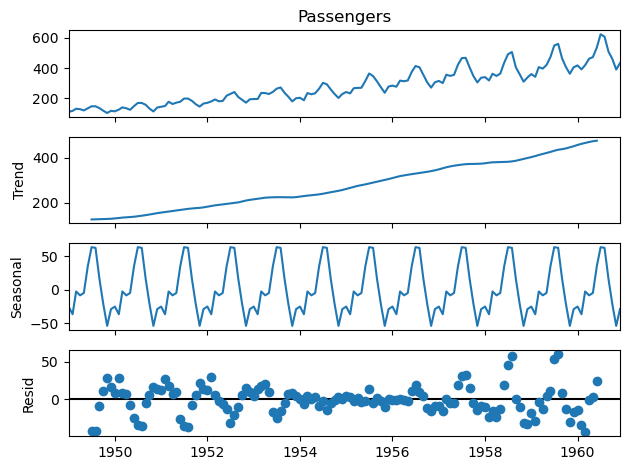

In [125]:
grafica_model_multiplicative=ete.plot()

### Prueba de estacionalidad 

<Axes: xlabel='Month'>

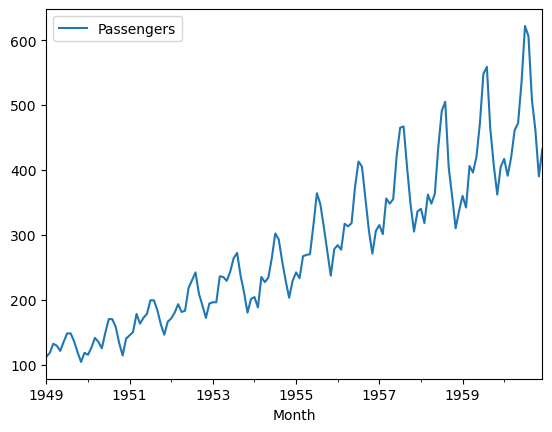

In [126]:
df_aerolinea.plot()

In [127]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [128]:
df_aerolinea.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [129]:
serie_de_tiempo = df_aerolinea["Passengers"]

In [130]:
type(serie_de_tiempo)

pandas.core.series.Series

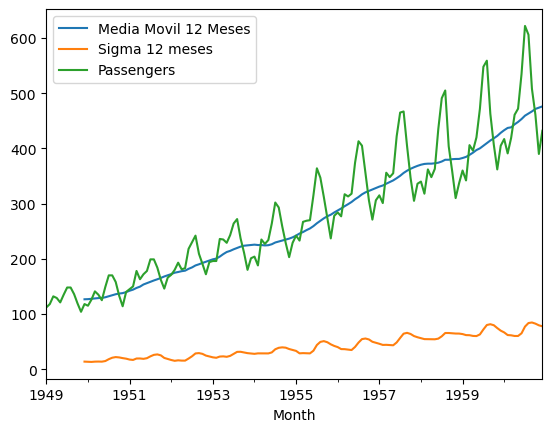

In [131]:
serie_de_tiempo.rolling(12).mean().plot(label="Media Movil 12 Meses")
serie_de_tiempo.rolling(12).std().plot(label="Sigma 12 meses")
serie_de_tiempo.plot()
plt.legend()
plt.show()

#### Prueba de Dickey Fuller Aumentada (ADF)

La Prueba de Dickey-Fuller Aumentada (ADF, Augmented Dickey-Fuller Test) es una prueba estadística utilizada para determinar si una serie temporal es estacionaria o si tiene una raíz unitaria, lo que indicaría que es no estacionaria.

¿Qué significa que una serie sea estacionaria?
Una serie temporal es estacionaria si sus propiedades estadísticas (como la media, la varianza y la autocorrelación) se mantienen constantes en el tiempo. Esto es importante porque muchos modelos de series temporales, como ARIMA, suponen que los datos son estacionarios.

Ejemplo de series estacionarias y no estacionarias:
Estacionaria: Si una serie oscila alrededor de una media constante con variabilidad estable en el tiempo.
No estacionaria: Si la serie tiene tendencia (crece o decrece con el tiempo) o una varianza cambiante.
¿Cómo funciona la Prueba de Dickey-Fuller?
La prueba ADF evalúa la hipótesis nula (H₀) de que la serie tiene una raíz unitaria, es decir, que no es estacionaria.

Hipótesis nula (H₀): La serie tiene una raíz unitaria (es decir, no estacionaria).

Hipótesis alternativa (H₁): La serie es estacionaria.

Si el p-valor es menor a un umbral (por lo general 0.05), se rechaza H₀, indicando que la serie es estacionaria.

#### Estadistico ADF

In [132]:
tes_adf= adfuller(df_aerolinea["Passengers"])
tes_adf

(0.815368879206051,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Interpretación de los resultados:

Estadístico ADF: Es el valor de la prueba estadística. Cuanto más negativo sea, mayor será la evidencia de estacionariedad.

p-valor: Si es menor que 0.05, rechazamos la hipótesis nula y concluimos que la serie es estacionaria.

Valores críticos: Son los valores de referencia a distintos niveles de confianza (1%, 5%, 10%).

Decisión:

Si p-valor < 0.05 → Rechazamos H₀ → La serie es estacionaria.

Si p-valor ≥ 0.05 → No rechazamos H₀ → La serie no es estacionaria.


#### Valor P

In [133]:
p_value = tes_adf[1]
print("El valor p es "+ str(p_value))

El valor p es 0.991880243437641


#### Validación de Hipotesis

In [134]:
alpha = 0.05

In [135]:
if p_value < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")


 No rechazamos H₀ → La serie no es estacionaria.


### Diferencias

In [136]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [137]:
df_aerolinea["Primera Diferencia"]=df_aerolinea["Passengers"]-df_aerolinea["Passengers"].shift(1)

In [138]:
df_aerolinea.head()

,Passengers,Primera Diferencia
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<Axes: xlabel='Month'>

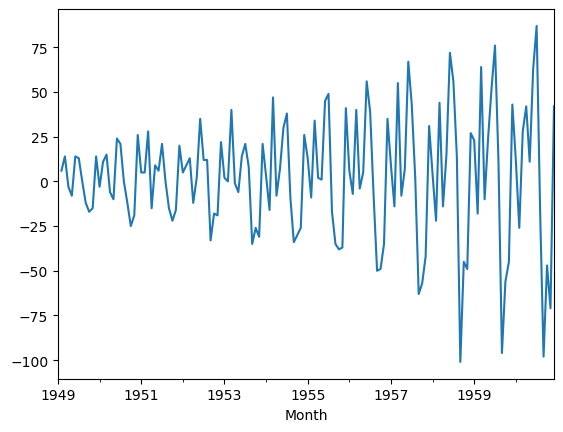

In [139]:
df_aerolinea["Primera Diferencia"].plot()

In [140]:
tes_adf_dif_1 = adfuller(df_aerolinea["Primera Diferencia"].dropna())
tes_adf_dif_1

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [141]:
p_value_dif_1 = tes_adf_dif_1[1]
p_value_dif_1

0.05421329028382711

In [142]:
if p_value_dif_1 < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

 No rechazamos H₀ → La serie no es estacionaria.


In [143]:
df_aerolinea.head()

,Passengers,Primera Diferencia
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [144]:
df_aerolinea["Segunda Diferencia"]=df_aerolinea["Primera Diferencia"]-df_aerolinea["Primera Diferencia"].shift(1)

In [145]:
df_aerolinea.head()

,Passengers,Primera Diferencia,Segunda Diferencia
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


<Axes: xlabel='Month'>

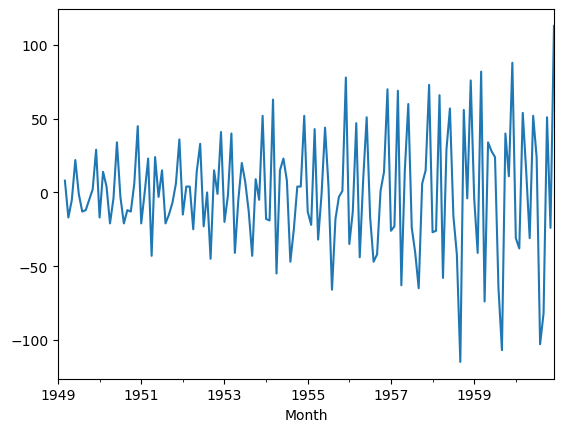

In [146]:
df_aerolinea["Segunda Diferencia"].plot()

In [147]:
tes_adf_dif_2 = adfuller(df_aerolinea["Segunda Diferencia"].dropna())
tes_adf_dif_2

(-16.384231542468537,
 2.7328918500140445e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275602)

In [148]:
p_value_dif_2 = tes_adf_dif_2[1]
p_value_dif_2

2.7328918500140445e-29

In [149]:
if p_value_dif_2 < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

Rechazamos H₀ → La serie es estacionaria.


#### Diferencia con Estacionalidad

In [150]:
df_aerolinea["Diferencia Estacionalidad"] = df_aerolinea["Passengers"]-df_aerolinea["Passengers"].shift(12)

In [151]:
df_aerolinea.head(20)

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


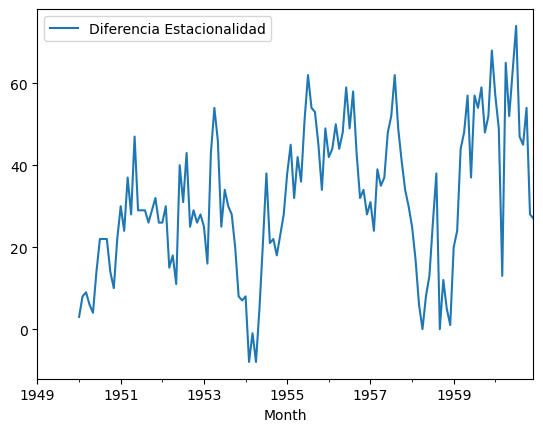

In [152]:
df_aerolinea["Diferencia Estacionalidad"].plot()
plt.legend()
plt.show()

In [153]:
tes_adf_dif_est= adfuller(df_aerolinea["Diferencia Estacionalidad"].dropna())
tes_adf_dif_est

(-3.3830207264924796,
 0.011551493085515008,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

In [154]:
p_value_dif_est = tes_adf_dif_est[1]
p_value_dif_est

0.011551493085515008

In [155]:
if p_value_dif_est < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

Rechazamos H₀ → La serie es estacionaria.


In [156]:
df_aerolinea["Primera Diferencia Estacionalidad"] = df_aerolinea["Primera Diferencia"]-df_aerolinea["Primera Diferencia"].shift(12)

In [157]:
df_aerolinea.head(24)

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN


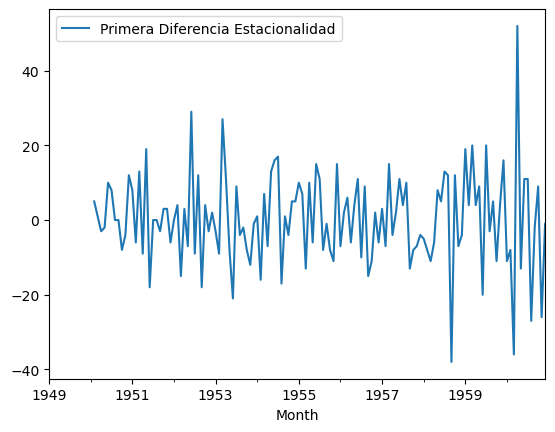

In [158]:
df_aerolinea["Primera Diferencia Estacionalidad"].plot()
plt.legend()
plt.show()

In [159]:
tes_adf_prim_dif_est= adfuller(df_aerolinea["Primera Diferencia Estacionalidad"].dropna())
tes_adf_prim_dif_est

(-15.595618083746338,
 1.856511600123444e-28,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.8428088960275)

### Partir la Base de Datos

In [160]:
df_aerolinea.head()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [161]:
df_aerolinea.describe()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
count,144.000000,143.000000,142.000000,132.000000,131.000000
mean,280.298611,2.237762,0.253521,31.772727,0.183206
std,119.966317,33.754282,39.855668,17.654699,12.356749
min,104.000000,-101.000000,-115.000000,-8.000000,-38.000000
25%,180.000000,-16.000000,-22.750000,21.000000,-7.500000
50%,265.500000,4.000000,-1.000000,30.000000,0.000000
75%,360.500000,22.500000,23.750000,45.250000,9.000000
max,622.000000,87.000000,113.000000,74.000000,52.000000


In [163]:
train = df_aerolinea[0:132]
train

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1959-08-01,559,11.0,-65.0,54.0,-3.0
1959-09-01,463,-96.0,-107.0,59.0,5.0
1959-10-01,407,-56.0,40.0,48.0,-11.0


In [170]:
tes = df_aerolinea[132:]
tes

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1960-01-01,417,12.0,-31.0,57.0,-11.0
1960-02-01,391,-26.0,-38.0,49.0,-8.0
1960-03-01,419,28.0,54.0,13.0,-36.0
1960-04-01,461,42.0,14.0,65.0,52.0
1960-05-01,472,11.0,-31.0,52.0,-13.0
1960-06-01,535,63.0,52.0,63.0,11.0
1960-07-01,622,87.0,24.0,74.0,11.0
1960-08-01,606,-16.0,-103.0,47.0,-27.0
1960-09-01,508,-98.0,-82.0,45.0,-2.0


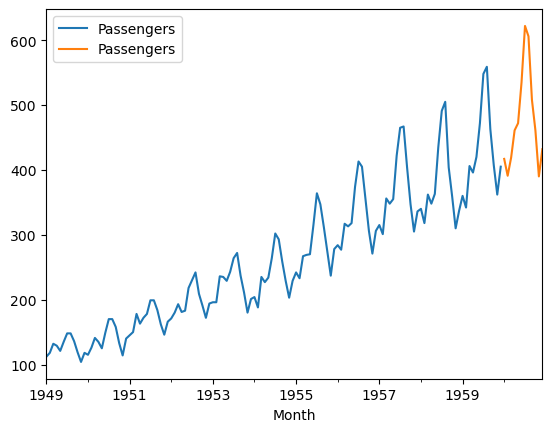

In [171]:
train["Passengers"].plot()
tes["Passengers"].plot()
plt.legend()
plt.show()